<h1 style="text-align: center;">Property Analysis Task</h1>
<br>
By: Rami Tailakh
<br>24 May 2017

In [1]:
# This section code to import all necessary packages required for this task
import warnings
warnings.filterwarnings('ignore')
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

## Get the Data

In [2]:
leads = pd.read_excel('Classification of Leads.xls')

In [3]:
leads.head()

,Mashvisor ID,Lead Cities of Interest,When did the lead start searching for a home?,When was the lead connected with an agent?,Financing Status at time connected with Agent:,Financing Status at purchase:,Final status of lead:
0,20658,Yonkers,2017-07-12 07:27:00,2017-07-12 07:08:00,Applying for a mortgage,Pre-Approved for a mortgage,Purchased Property
1,20655,Springfield,2017-07-12 06:49:00,2017-07-12 05:38:00,Applying for a mortgage,Pre-Approved for a mortgage,Submitted Offer
2,20654,Coos Bay,2017-07-12 05:59:00,2017-07-12 01:05:00,Applying for a mortgage,Not sure yet,Submitted Offer
3,20653,Buffalo,2017-07-12 05:38:00,2017-07-12 01:02:00,Applying for a mortgage,Applying for a mortgage,Submitted Offer
4,20652,Chicago,2017-07-12 01:05:00,2017-07-11 23:10:00,Applying for a mortgage,Paying Cash,Searched for a Property


## Data Preprocessing
Here, we will basically look for any missings or defects in data. We will also 

In [4]:
leads.describe()

,Mashvisor ID
count,7188.000000
mean,16913.425710
std,2319.768839
min,137.000000
25%,15103.750000
50%,16953.500000
75%,18798.250000
max,20658.000000


In the next code, it can be seen that there are 92 null (or blank) values in the <b>Lead Cities of Interest</b> field. These observations, that have missing of the name of a city, will not be neglected, rather, it will be shown as <b>UNKOWN</b>.

In [5]:
leads.isnull().sum()

Mashvisor ID                                       0
Lead Cities of Interest                           92
When did the lead start searching for a home?      0
When was the lead connected with an agent?         0
Financing Status at time connected with Agent:     0
Financing Status at purchase:                      0
Final status of lead:                              0
dtype: int64

In [6]:
leads['Lead Cities of Interest'] = leads['Lead Cities of Interest'].fillna('UNKNOWN') 

The next code is to make sure that there are no extra spaces in city names, for instance, the computer machine will see that 'Chicago ' and 'Chicago' as two different cities.

In [7]:
leads['Lead Cities of Interest'] = leads['Lead Cities of Interest'].str.strip()

According to the next code, it can be seen that there are no missings.

In [8]:
leads.isnull().sum()

Mashvisor ID                                      0
Lead Cities of Interest                           0
When did the lead start searching for a home?     0
When was the lead connected with an agent?        0
Financing Status at time connected with Agent:    0
Financing Status at purchase:                     0
Final status of lead:                             0
dtype: int64

In the follwoing code, we will add a new column to our dataset. This column will be used to represent the difference between <b>When did the lead start searching for a home</b> and <b>When was the lead connected with an agent</b>.

In [9]:
import datetime

def days_parse(s,e):
    td = pd.Timedelta(s - e)
    return td/ np.timedelta64(1, 'D')

leads['days_diff'] = leads.apply(lambda x: days_parse(x['When was the lead connected with an agent?'], x['When did the lead start searching for a home?']), axis=1)


In [10]:
leads

,Mashvisor ID,Lead Cities of Interest,When did the lead start searching for a home?,When was the lead connected with an agent?,Financing Status at time connected with Agent:,Financing Status at purchase:,Final status of lead:,days_diff
0,20658,Yonkers,2017-07-12 07:27:00,2017-07-12 07:08:00,Applying for a mortgage,Pre-Approved for a mortgage,Purchased Property,-0.013194
1,20655,Springfield,2017-07-12 06:49:00,2017-07-12 05:38:00,Applying for a mortgage,Pre-Approved for a mortgage,Submitted Offer,-0.049306
2,20654,Coos Bay,2017-07-12 05:59:00,2017-07-12 01:05:00,Applying for a mortgage,Not sure yet,Submitted Offer,-0.204167
3,20653,Buffalo,2017-07-12 05:38:00,2017-07-12 01:02:00,Applying for a mortgage,Applying for a mortgage,Submitted Offer,-0.191667
4,20652,Chicago,2017-07-12 01:05:00,2017-07-11 23:10:00,Applying for a mortgage,Paying Cash,Searched for a Property,-0.079861
5,20631,Waco,2017-07-11 15:27:00,2017-07-12 01:02:00,Applying for a mortgage,Not sure yet,Lead is Not Responsive,0.399306
6,20630,San Jose,2017-07-11 10:53:00,2017-07-11 16:14:00,Applying for a mortgage,Paying Cash,Submitted Offer,0.222917
7,20629,San Mateo,2017-07-11 14:32:00,2017-07-11 23:10:00,Applying for a mortgage,Applying for a mortgage,Purchased Property,0.359722
8,20628,Arden,2017-07-11 13:55:00,2017-07-11 22:37:00,Applying for a mortgage,Not sure yet,Submitted Offer,0.362500
9,20626,Phoenix,2017-07-11 13:41:00,2017-07-11 21:52:00,Applying for a mortgage,Pre-Approved for a mortgage,Purchased Property,0.340972


## Data Frequency Visualization

Data frequency according to the conditions: <b>Final status of lead:</b> and <b>Financing Status at purchase:</b> fields

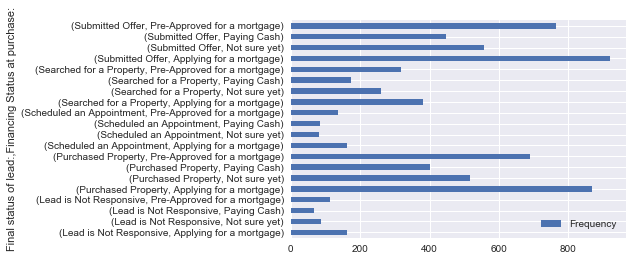

In [11]:
df_leads_1 = pd.DataFrame(leads.groupby(['Final status of lead:','Financing Status at purchase:'])['Final status of lead:'].agg({'Frequency':'count'}))
df_leads_1.plot(kind='barh')



Data frequency according to the conditions: <b>Final status of lead</b> and <b>Financing Status at time connected with Agent</b> fields

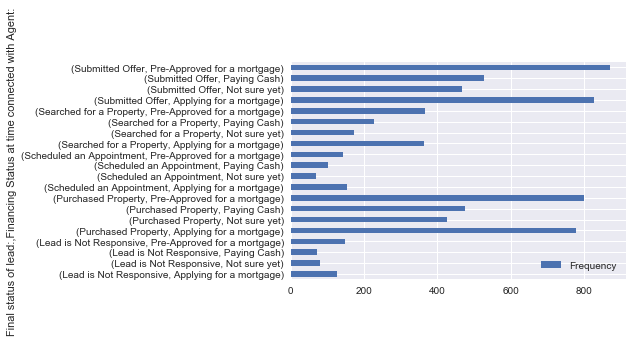

In [12]:
df_leads_2 = pd.DataFrame(leads.groupby(['Final status of lead:','Financing Status at time connected with Agent:'])['Final status of lead:'].agg({'Frequency':'count'}))
df_leads_2.plot(kind='barh')


## Data Analysis

Please note that the proposed solutin was dealing each part of each question independently.
#### 1. What’s the likelihood that the ‘Final status of lead’ is ‘Purchased Property’ if:

Financing status at time connected with Agent is ‘Applying for a mortgage’

In [13]:
leads_1_a = leads[(leads['Final status of lead:'] == 'Purchased Property') & (leads['Financing Status at time connected with Agent:'] == 'Applying for a mortgage')]
((leads_1_a.size/leads.size).round(2) * 100).astype('int').astype('str')+'%'

'11%'

Financing status at purchase is ‘Paying Cash’

In [14]:
leads_1_b = leads[(leads['Final status of lead:'] == 'Purchased Property') & (leads['Financing Status at purchase:'] == 'Paying Cash')]
((leads_1_b.size/leads.size).round(2) * 100).astype('int').astype('str')+'%'

'6%'

#### 2. What’s the likelihood that the ‘Final status of lead’ is ‘Purchased Property’ if the difference between ‘When did the lead start searching for a home’ and ‘When was the lead connected with an agent is:
<ul>
<li>2 Days</li>
<li>3 Day</li> 
<li>4 Day</li> 
<li>5 & more Days</li> 
</ul>

In [15]:
leads_2_2d = leads[((leads['days_diff'] >= 2.0) &(leads['days_diff'] < 3.0)) & (leads['Final status of lead:'] == 'Purchased Property')]
print('2 Days: ', ((leads_2_2d.size/leads.size).round(2) * 100).astype('int').astype('str'),'%')
leads_2_3d = leads[((leads['days_diff'] >= 3.0) &(leads['days_diff'] < 4.0)) & (leads['Final status of lead:'] == 'Purchased Property')]
print('3 Days: ', ((leads_2_3d.size/leads.size).round(2) * 100).astype('int').astype('str'),'%')
leads_2_4d = leads[((leads['days_diff'] >= 4.0) &(leads['days_diff'] < 5.0)) & (leads['Final status of lead:'] == 'Purchased Property')]
print('4 Days: ', ((leads_2_4d.size/leads.size).round(2) * 100).astype('int').astype('str'),'%')
leads_2_5d = leads[(leads['days_diff'] >= 5.0) & (leads['Final status of lead:'] == 'Purchased Property')]
print('5 Days & more: ', ((leads_2_5d.size/leads.size).round(2) * 100).astype('int').astype('str'),'%')

2 Days:  1 %
3 Days:  0 %
4 Days:  0 %
5 Days & more:  26 %


#### 3. What ‘Lead Cities’ have the highest probability to be ‘Purchased Property’ as Final status of lead?

In [16]:
leads_3 = leads[leads['Final status of lead:'] == 'Purchased Property']
leads_3_count = leads_3.groupby(['Lead Cities of Interest']).agg(['count'])
leads_3_count.idxmax()[1]

'Chicago'

In [17]:
# number of observations
len(leads[(leads['Final status of lead:'] == 'Purchased Property') & (leads['Lead Cities of Interest'] == 'Chicago')])

302

In [18]:
leads['When did the lead start searching for a home?'].map(lambda x: x.strftime('%Y-%m')).unique()

array(['2017-07', '2017-06', '2017-05', '2017-04', '2017-03'], dtype=object)

The above results show the likelihood according to the given criteria in this task, however, the given results could only be valid for the months: March, April, May, June and July for the given cities. In other words, these results may not be generalized for new data, and specifically, new cities or months of a year. Nonetheless, we can restructure our dataset where we can add a new column categorizing time difference between: start searching for a home and connecting with agent, in categories such as: less than 2 days, 2 days, 3 days, 4 days, and 5 & more. Then, machine learning models can be employed to help have better prediction results of the final status of lead. However, "the more data the better", that is, it would be more useful, if data, reprents a whole year, was utilized in this task. 